# Phonon Dispersion Relation Calculation for FCC and BCC structures

This is a Jupyter Notebook for showing you how to calculate the phonon dispersion relation in different structures.

Phonons, bosonic quasiparticles, are lattice atom vibrations and can come in transversal or longitudinal waveform.
The atoms in a lattice vibrate because, it is essentially a mass-spring system. For small deviations of an atom position from its equilibrium position, we can assume a linear spring between an atom and its nearest neighbors.

For a **1D** system (a chain of atoms), the equation of motion looks like:
$$ M\frac{d^2u_l}{dt^2} = C(u_{l-1}-u_l) + C(u_{l+1}-u_l)$$
with M, the mass of an atom and $u_l$, the displacement of atom l from equilibrium. C is the spring constant.

To find the normal modes of the system (oscillations of atoms with same frequency), we use this Ansatz:
$$ u_l = A_l exp(i\omega t)$$ with $A_l$, the oscillation Amplitude of atom l and $\omega$, the angular frequency.

Because this Ansatz has to be fulfilled for every atom in the lattice, the solution will be an eigenfunction of the Translation Operator T. We can write the equations of motion in matrix form, and then as eigenvalue problem:
$$[(2C-\omega^2M)I-C(T+T^{-1})]\vec{A} = 0$$
The eigenvalues will give us the corresponding allowed frequency for a certain k-vector. This results in the dispersion relation $\omega (\vec{k})$


In **3D** systems, these equations will look a little bit different.
Still, they can be linearized and put into matrix form. We can then solve for eigenvalues which will give us the dispersion relation $\omega (\vec{k})$<br>
We will later see, what the matrices look like.

## Python Imports

First, we have to import some libraries we are going to use for calculation & plotting.
(see cell below)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    

## Lattice Geometry

Now, we are going to define some utility functions.
With lattice geometry functions, we can easily calculate the reciprocal lattice of a given lattice.
Also, basic vector geometry is included.

! _x, _y, _z are the unit vectors in the cartesian coordinate system !<br>
Using them, we can calculate the $\vec{a_1},\vec{a_2},\vec{a_3}$ (primitive lattice unit vectors) and <br>
$\vec{b_1},\vec{b_2},\vec{b_3}$ (reciprocal lattice unit vectors) for both lattice systems.

In [23]:
_x = np.asarray([1, 0, 0])  # unit vectors in x,y,z
_y = np.asarray([0, 1, 0])
_z = np.asarray([0, 0, 1])
    
# returns 3 primitive lattice vectors of FCC
def primitiveLatticeVectorsFCC(a=1):
    a1 = 0.5 * a * (_x + _z)
    a2 = 0.5 * a * (_x + _y)
    a3 = 0.5 * a * (_y + _z)
    return a1,a2,a3

# returns 3 primitive lattice vectors of BCC
def primitiveLatticeVectorsBCC(a=1):
    a1 = 0.5 * a * (_x + _y - _z)
    a2 = 0.5 * a * (-_x + _y + _z)
    a3 = 0.5 * a * (_x - _y + _z)
    return a1,a2,a3

# squared absolute length of vector
def absVector(v:np.ndarray) -> float:
    return np.sqrt(np.dot(v,v))

# norms a vector to length 1
def normVector(v:np.ndarray) -> np.ndarray:
    return v / absVector(v)

# gives back 3 unit vectors (reciprocal) to a set 3 of input vectors
def reciprocalVectors(a1:np.ndarray,a2:np.ndarray,a3:np.ndarray):
    b1 = 2*np.pi * np.cross(a2,a3) / (np.dot(a1,np.cross(a2,a3)))
    b2 = 2 * np.pi * np.cross(a3, a1) / (np.dot(a2, np.cross(a3, a1)))
    b3 = 2 * np.pi * np.cross(a1, a2) / (np.dot(a3, np.cross(a1, a2)))
    return b1,b2,b3

## Equations of Motion, Matrices for FCC and BCC

In the introduction I showed what the equations of motions and the eigenvalues problem looks like in a 1D system.
Below, we have functions that return a matrix which summarizes up all the equations of motion for an FCC or BCC lattice!

We use them for the calculation of allowed frequencies in a certain direction (a certain k-vector).

Sources:
- http://lampx.tugraz.at/~hadley/ss1/phonons/bcc/bcc.php
- http://lampx.tugraz.at/~hadley/ss1/phonons/fcc/fcc.php
- http://lampx.tugraz.at/~hadley/ss1/phonons/fcc/fcc2.php


**Input Parameters**:<br>
kx, ky, kz are the x,y,z components of the k-vector.<br>
a: the lattice constant in real space<br>
C21: the spring constant to the next-nearest neighbor atoms

In [30]:
# http://lampx.tugraz.at/~hadley/ss1/phonons/bcc/bcc.php
def BCC_matrix_hadley1(kx:float, ky:float, kz:float, a:float, C21:float = 0):
    m11 = (2 / 3) * (-np.cos(0.5 * (-kx*a + ky*a + kz*a)) - np.cos(0.5 * (kx*a + ky*a - kz*a)) - np.cos(
        0.5 * (kx*a - ky*a + kz*a)) - np.cos(0.5 * (kx*a + ky*a + kz*a)) + 4) - 2 * C21 * (np.cos(kx*a) - 1)
    m12 = (2 / 3) * (np.cos(0.5 * (-kx*a + ky*a + kz*a)) - np.cos(0.5 * (kx*a + ky*a - kz*a)) + np.cos(
        0.5 * (kx*a - ky*a + kz*a)) - np.cos(0.5 * (kx*a + ky*a + kz*a)))
    m13 = (2 / 3) * (np.cos(0.5 * (-kx*a + ky*a + kz*a)) + np.cos(0.5 * (kx*a + ky*a - kz*a)) - np.cos(
        0.5 * (kx*a - ky*a + kz*a)) - np.cos(0.5 * (kx*a + ky*a + kz*a)))

    m23 = (2 / 3) * (-np.cos(0.5 * (-kx*a + ky*a + kz*a)) + np.cos(0.5 * (kx*a + ky*a - kz*a)) + np.cos(
        0.5 * (kx*a - ky*a + kz*a)) - np.cos(0.5 * (kx*a + ky*a + kz*a)))

    m21 = m12
    m22 = (2 / 3) * (-np.cos(0.5 * (-kx*a + ky*a + kz*a)) - np.cos(0.5 * (kx*a + ky*a - kz*a)) - np.cos(
        0.5 * (kx*a - ky*a + kz*a)) - np.cos(0.5 * (kx*a + ky*a + kz*a)) + 4) - 2 * C21 * (np.cos(ky*a) - 1)

    m31 = m13
    m32 = m23
    m33 = (2 / 3) * (-np.cos(0.5 * (-kx * a + ky * a + kz * a)) - np.cos(0.5 * (kx * a + ky * a - kz * a)) - np.cos(
        0.5 * (kx * a - ky * a + kz * a)) - np.cos(0.5 * (kx * a + ky * a + kz * a)) + 4) - 2 * C21 * (
                      np.cos(kz * a) - 1)

    M = np.matrix([[m11, m12, m13], [m21, m22, m23], [m31, m32, m33]])
    return M

# http://lampx.tugraz.at/~hadley/ss1/phonons/fcc/fcc.php
# http://lampx.tugraz.at/~hadley/ss1/phonons/fcc/fcc2.php
def FCC_matrix_hadley1(kx:float, ky:float, kz:float, a:float, C21:float = 0):
    m11 = 4 - np.cos(0.5*a*(kx+ky)) - np.cos(0.5*a*(kx+kz)) - np.cos(0.5*a*(kx-ky)) - np.cos(0.5*a*(kx-kz))
    m22 = 4 - np.cos(0.5*a*(kx+ky)) - np.cos(0.5*a*(ky+kz)) - np.cos(0.5*a*(kx-ky)) - np.cos(0.5*a*(ky-kz))
    m33 = 4 - np.cos(0.5*a*(kx+kz)) - np.cos(0.5*a*(ky+kz)) - np.cos(0.5*a*(kx-kz)) - np.cos(0.5*a*(ky-kz))

    m12 = - np.cos(0.5*a*(kx+ky)) + np.cos(0.5*a*(kx-ky))
    m13 = - np.cos(0.5*a*(kx+kz)) + np.cos(0.5*a*(kx-kz))
    m23 = - np.cos(0.5*a*(ky+kz)) + np.cos(0.5*a*(ky-kz))

    m31 = m13
    m32 = m23
    m21 = m12

    M = np.matrix([[m11, m12, m13], [m21, m22, m23], [m31, m32, m33]])
    return M



## Symmetry Points in FCC and BCC

To give the dispersion relation for a specific direction or distance, we need to define all symmetry points inside the 1st Brillouin Zone.<br>
Symmetry points are certain, important points in the 1st Brillouin zone of a lattice system.<br>
The Brillouin zone is a truncated version of the reciprocal lattice of the real primitive unit cell.<br>

I created 2 classes which hold the coordinates in (u,v,w) space for each point.

The position of a symmetry point (in reciprocal space) is then given as:
$$\vec{k} = u\vec{b_1}+v\vec{b_2}+w\vec{b_3}$$
with $\vec{b_1}, \vec{b_2}, \vec{b_3}$ the unit vectors of the reciprocal lattice.

In **FCC**, there are $\Gamma, X,L,W,U,K$ whereas<br>
in **BCC**, there are $\Gamma, H,P,N$

In [31]:
# --- Class to retrieve U V W factors for b1,b2,b3 for BCC symmetry points ---
# k = u b1 + v b2 + w b3
class SymmetryPoints_BCC(object):
    GAMMA = [0, 0, 0]
    H = [-0.5, 0.5, 0.5]
    P = [0.25, 0.25, 0.25]
    N = [0, 0.5, 0]

    def __init__(self):
        pass

    def getUVW(self, name:str) -> list:
        ret = None
        if name == "G" or name == "g" or name == "gamma" or name == "GAMMA":
            ret = self.GAMMA
        elif name == "H" or name == "h":
            ret = self.H
        elif name == "p" or name == "P":
            ret = self.P
        elif name == "n" or name == "N":
            ret = self.N
        else:
            print("dont know that symmetry point")
            ret = [-1,-1,-1]
        return ret

class SymmetryPoints_FCC(object):
    GAMMA = [0, 0, 0]
    X = [0, 1/2, 1/2]
    L = [1/2, 1/2, 1/2]
    W = [1/4, 3/4, 1/2]
    U =[1/4, 5/8, 5/8]
    K = [1/4, 3/4, 3/8]

    def __init__(self):
        pass

    def getUVW(self, name:str) -> list:
        ret = None
        if name == "G" or name == "g" or name == "gamma" or name == "GAMMA": #913
            ret = self.GAMMA
        elif name == "X" or name == "x":
            ret = self.X
        elif name == "L" or name == "l":
            ret = self.L
        elif name == "W" or name == "w":
            ret = self.W
        elif name == "U" or name == "u":
            ret = self.U
        elif name == "K" or name == "k":
            ret = self.K
        else:
            print("dont know that symmetry point")
            ret = [-1,-1,-1]
        return ret
    

## Solving & Plotting the phonon dispersion relation !

These are functions which help in both, FCC and BCC, scenarios.<br>

*plotPhononDispersion* will plot the resulting curve,<br>
*solveAlgebraicEquations* will solve a given Matrix for its eigenvalues.

*testFCCdispersion* and *testBCCdispersion* are finally for taking the user's parameters and running the whole calculation, solving and plotting included.

In [32]:
# PLOT
def plotPhononDispersion(energies, ks, N_ints, points, title):
    
    # plot EV over index of k-state
    plt.plot(np.arange(len(energies[0])), energies[0])
    plt.plot(np.arange(len(energies[1])), energies[1])
    plt.plot(np.arange(len(energies[2])), energies[2])
    maxenergy = np.matrix.max(np.asmatrix(energies))
    for j in range(len(points)):
        plt.axvline(x=np.sum(N_ints[:j]), color="red", label=points[j])
        plt.text(x=np.sum(N_ints[:j]), y=-0.3, s=points[j])

    plt.title(f"{title}\n"
              f"{points}")
    plt.grid()
    plt.ylabel("w (M/C)**1/2")
    plt.xlabel("index of k-vector")
    plt.ylim((-0.5, 1.5 * maxenergy))
    plt.show()
    
# solve Matrix equations for Eigenvalues
# uses numpy.linalg.eig for solving Eigenvalue problem
def solveAlgebraicEquations(k_all, N_interp_is, a, c21, matrixFunction = FCC_matrix_hadley1):

    lambdas = []  # stores eigenvalues
    ks = []  # stores |k|'s
    plt.figure()
    for j in range(len(k_all)):  # for each SymPoint <--> SymPoint distance
        for i in range(N_interp_is[j]):  # for each interpolation step (k-vector)
            # get eigenvalue .. lambda = m w² / sqrt3 c
            # make equation M u_xyz = Mw² / sqrt3 C  * u_xyz
            # M = algebraic_BCC_matrix(k_all[j][0][i], k_all[j][1][i], k_all[j][2][i], a=a_bccIron)
            M = matrixFunction(k_all[j][0][i], k_all[j][1][i], k_all[j][2][i], a=a, C21=c21)

            # solve eigenvalue equation M(v-IL) = 0
            eval, evec = np.linalg.eig(M)
            eval = [np.sqrt(complex(eval[i]).real) for i in range(len(eval))]
                # append eigenvalues and k-vectors
            lambdas.append(np.sort(np.array(eval)))
                # append absolute values of k
            ks.append(k_all[j][0][i] ** 2 + k_all[j][1][i] ** 2 + k_all[j][2][i] ** 2)

    # transpose the resulting eigenvalues for plotting
    lambdas2 = np.asarray(lambdas).transpose()
    return lambdas2,ks

# takes vector of [kx,ky,kz]_i and interpolates them
def ks_and_interpolation(kxyzs,N_interp):
    k_all = []
    d0 = kxyzs[1] - kxyzs[0]
    abs_d0 = np.sqrt(np.dot(d0, d0))
    N_interp_is = []
    for i in range(len(kxyzs) - 1):
        di = kxyzs[i + 1] - kxyzs[i]
        abs_di = np.sqrt(np.dot(di, di))
        N_interp_i = int(N_interp * abs_di / abs_d0)
        k_all.append([np.linspace(kxyzs[i][0], kxyzs[i + 1][0], N_interp_i),
                      np.linspace(kxyzs[i][1], kxyzs[i + 1][1], N_interp_i),
                      np.linspace(kxyzs[i][2], kxyzs[i + 1][2], N_interp_i)])
        N_interp_is.append(N_interp_i)

    return k_all,N_interp_is


# calculate BCC dispersion relation
def testBCCdispersion(a, c21=0.1, N_interp=100, points = ["g", "h", "p", "g", "n"] ):
    # get dispersion relation of iron for Gamma to H
    a1_bcc, a2_bcc, a3_bcc = primitiveLatticeVectorsBCC(a)  # primitive lattice vectors
    b1_bcc, b2_bcc, b3_bcc = reciprocalVectors(a1_bcc, a2_bcc, a3_bcc)  # reciprocal lattice vectors

    # get symmetry points
    SPBCC = SymmetryPoints_BCC()                              # select symmetry points
    uvws = [SPBCC.getUVW(points[i]) for i in range(len(points))]    # get uvw coordinates for all SP's
    kxyzs = [(uvws[i][0] * b1_bcc + uvws[i][1] * b2_bcc + uvws[i][2] * b3_bcc) # get k-vector coordinates for all SP's
             for i in range(len(uvws))]

    # make k-vector arrays for distance between Symmetry points
    k_all, N_interp_is = ks_and_interpolation(kxyzs, N_interp)

    # solve
    energies, ks = solveAlgebraicEquations(k_all, N_interp_is, a, c21, BCC_matrix_hadley1)

    plotPhononDispersion(energies,ks, N_interp_is, points,
                         f"Phonon Dispersion Relation of BCC Structure, C21 = {c21}")
    
    return


# calculate FCC dispersion relation
def testFCCdispersion(a, c21=0.1, N_interp=100, points = ["g", "x", "w", "k", "g","l"]):
    # get dispersion relation of iron for Gamma to H
    a1_fcc, a2_fcc, a3_fcc = primitiveLatticeVectorsFCC(a)  # primitive lattice vectors
    b1_fcc, b2_fcc, b3_fcc = reciprocalVectors(a1_fcc, a2_fcc, a3_fcc)  # reciprocal lattice vectors

    # get symmetry points
    SPFCC = SymmetryPoints_FCC()
    uvws = [SPFCC.getUVW(points[i]) for i in range(len(points))]  # get uvw coordinates for all SP's
    kxyzs = [(uvws[i][0] * b1_fcc + uvws[i][1] * b2_fcc + uvws[i][2] * b3_fcc)  # get k-vector coordinates for all SP's
             for i in range(len(uvws))]

    # make k-vector arrays for distance between Symmetry points
    k_all,N_interp_is = ks_and_interpolation(kxyzs, N_interp)

    # solve problem
    energies, ks = solveAlgebraicEquations(k_all, N_interp_is, a, c21, FCC_matrix_hadley1)
    
    plotPhononDispersion(energies,ks, N_interp_is, points,
                         f"Phonon Dispersion Relation of FCC Structure")
    
    return

## Run the Phonon Dispersion Relation Simulation Yourself !

Now, it's time to try out some stuff yourself!

Below you find 2 cells for running both the **BCC and FCC scenario**,
with **lattice parameters and spring constants for you to define**!<br>
Also, **choose the symmetry points yourself** by editing the list.

In [33]:
# --- Here begins the editable part ---

c21 = 0.3*c1            # spring constant next nearest neighbours
N_interpolate = 50      # keep this between 50 and 200  (enough k-points for calculation of bands)
                        # interpolation steps for first 2 Symmetry points (the others adapt accordingly)

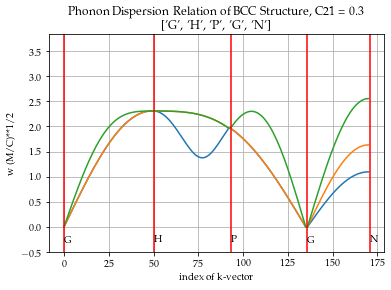

In [34]:
# Run the BCC Dispersion Relation (yourself)!

points_bcc = ["G", "H", "P", "G", "N"]      # Symmetry points
a_bccIron = 0.2866e-9   # meters, Lattice constant for BCC Iron
testBCCdispersion(a= a_bccIron, c21=c21, N_interp=N_interpolate,points=points_bcc)

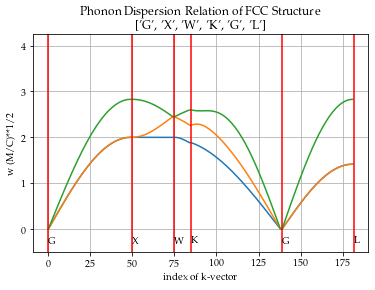

In [35]:
# Run the FCC Dispersion Relation (yourself)!

a_fccIron = 0.3571e-9   # Lattice constant for FCC Iron
points_fcc = ["G", "X", "W", "K", "G", "L"]
testFCCdispersion(a= a_fccIron, c21=c21, N_interp=N_interpolate,points=points_fcc)